## Условие 1: Задача 1<br>
- Постройте график<br>
- Назовите график<br>
- Сделайте именование оси x и оси y<br>
- Сделайте выводы




In [ ]:
# Импортируем все необходимые библиотеки для выполнения работы и визуализации данных.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

* 1.1. **Скачать следующие данные:** kc-house-data

In [ ]:
hd = pd.read_csv('/content/kc_house_data.csv') # cкачиванния данных происходит без ошибок.
pd.set_option('display.max_columns', None) # Вывод максимального количества столбцов в DataFrame
hd.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10821,4139700260,20141117T000000,795000.0,5,3.5,3330,3705,2.0,0,0,3,9,2610,720,2008,0,98006,47.5567,-122.124,2810,3971


1.2. **Изучите стоимости недвижимости**

In [ ]:
hd.describe() #Основная сводная статистика , c помощью которой можно начать изучение стоимости.

In [ ]:
hd['price'].idxmax()

In [ ]:
hd.loc[7252,:] # Для изучения стоимости посмотрим на все признаки максимальной цены.

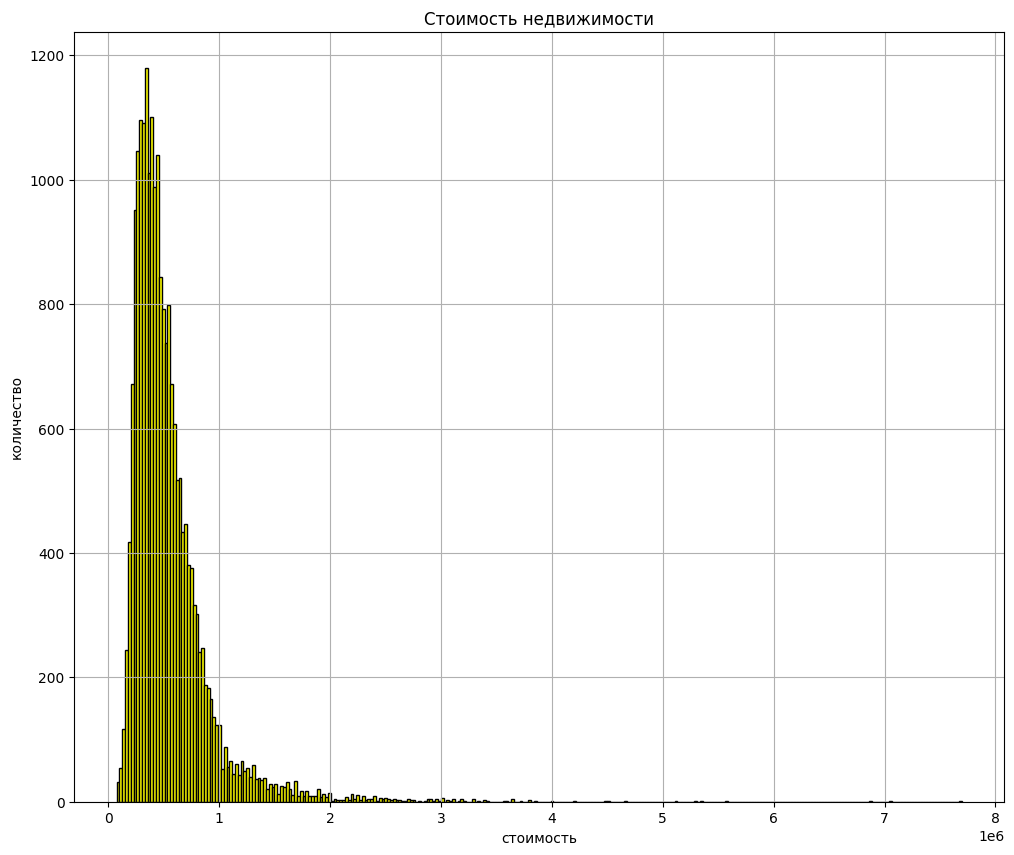

In [ ]:
plt.figure(figsize= (12,10))
plt.hist(hd['price'],bins =300 ,color= 'yellow' , edgecolor = 'black')
plt.title('Стоимость недвижимости')
plt.xlabel('стоимость')
plt.ylabel('количество')
plt.grid();



* **Стоимость недвижимости варьируется,распределение стоимости  не соответствует норме ,дорогой недвижимость согласно гистограмме  не много.Предполагаю, что есть  признаки которые влияют на стоимость.**

1.3. **Изучите распределение квадратуры жилой**

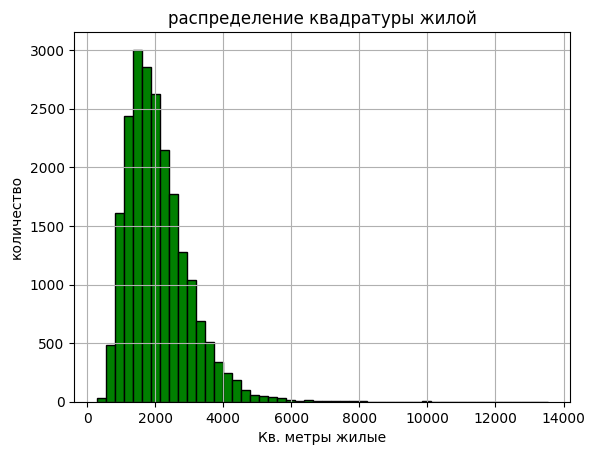

In [ ]:
plt.hist(hd['sqft_living'],bins = 50, color = 'green', edgecolor = 'black')
plt.title('распределение квадратуры жилой')
plt.xlabel('Кв. метры жилые')
plt.ylabel('количество')
plt.grid();

* **Распределение квадратных метров происходит в том же порядке что и стоимость недвижимости в минимальных значениях максимальное превалирование.**

1.4. **Изучите распределение года постройки**

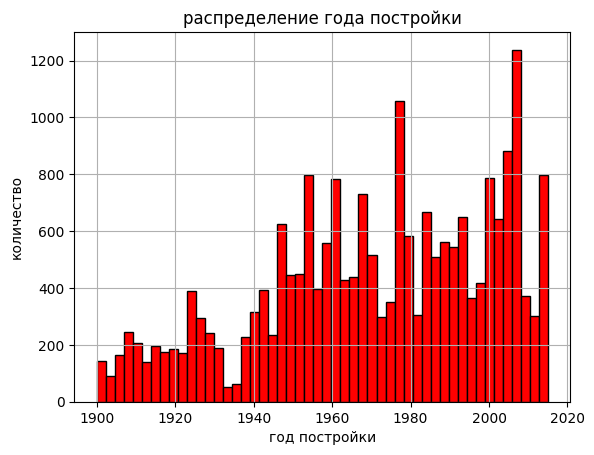

In [ ]:
plt.hist(hd['yr_built'],bins=50, color = 'red', edgecolor = 'black')
plt.title('распределение года постройки')
plt.xlabel('год постройки')
plt.ylabel('количество')
plt.grid();

* **Можно отметить что начиная с 1940года дома строились гораздо чаще.**

## Условие 2: 2 Задача
* 2.1. **Изучите распределение домов от наличия вида на набережную**<br> Постройте график <br>Сделайте выводы

In [ ]:
data_w = hd['waterfront'].value_counts()
data_w

0    21450
1      163
Name: waterfront, dtype: int64

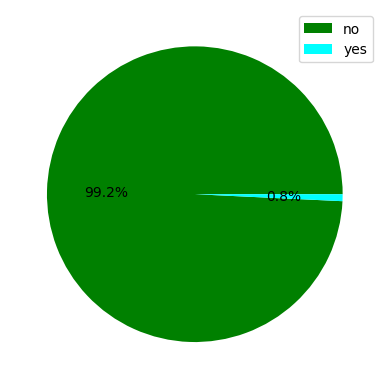

In [ ]:
plt.pie(data_w,autopct='%1.1f%%',colors =('green','cyan'))
plt.legend(['no', 'yes']);

* **Вид на набережную имеют всего 163 дома, что составляет 0.8% от общего количества , можно предположить что этот факт может повлиять на стоимость  недвижимости.**

* 2.2. **Изучите распределение этажей домов**

In [ ]:
data_f = hd['floors'].value_counts()
data_f

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

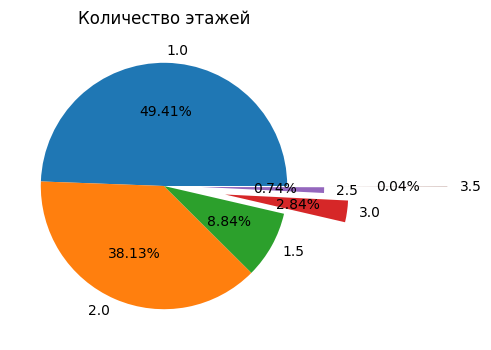

In [ ]:
plt.figure(figsize=(6, 4))
plt.pie(data_f, autopct='%1.2f%%', labels=data_f.index , explode = (0.0, 0.0, 0.0, 0.5, 0.3, 1.3))
plt.title('Количество этажей');

* **Домов с 1 этажом почти 50%**

* 2.3. **Изучите распределение состояния домов**



In [ ]:
data_c= hd['condition'].value_counts()
data_c

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

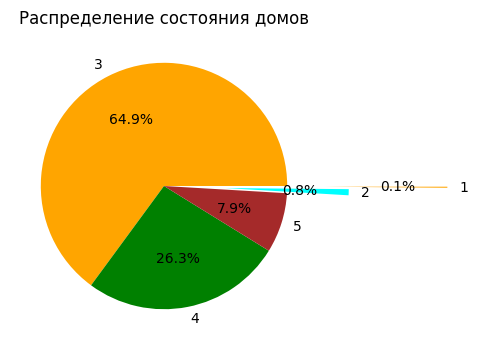

In [ ]:
plt.figure(figsize=(6, 4))
plt.pie(data_c, autopct='%1.1f%%', labels=data_c.index, explode = (0.0, 0.0, 0.0, 0.5, 1.3),colors = ( "orange", "green", "brown","cyan"))
plt.title('Распределение состояния домов');

* **В основном дома по состоянию на троичку.Что согласно графику 64%.Присутствуют дома в критичном состоянии,в количестве 30,в процентном соотношении составляет 0.1%.**

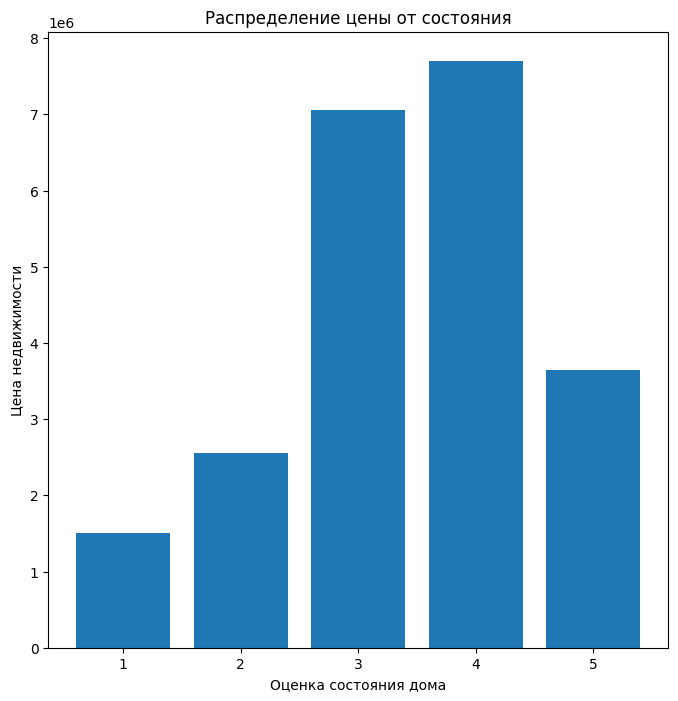

In [ ]:
plt.figure(figsize= (8,8))
plt.bar(hd['condition'],hd['price'])
plt.title("Распределение цены от состояния")
plt.xlabel("Оценка состояния дома")
plt.ylabel("Цена недвижимости");

## Условие 3: 3 Задача
* Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
* Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

#корреляция для анализа данных

In [ ]:
corr_matrix = hd.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


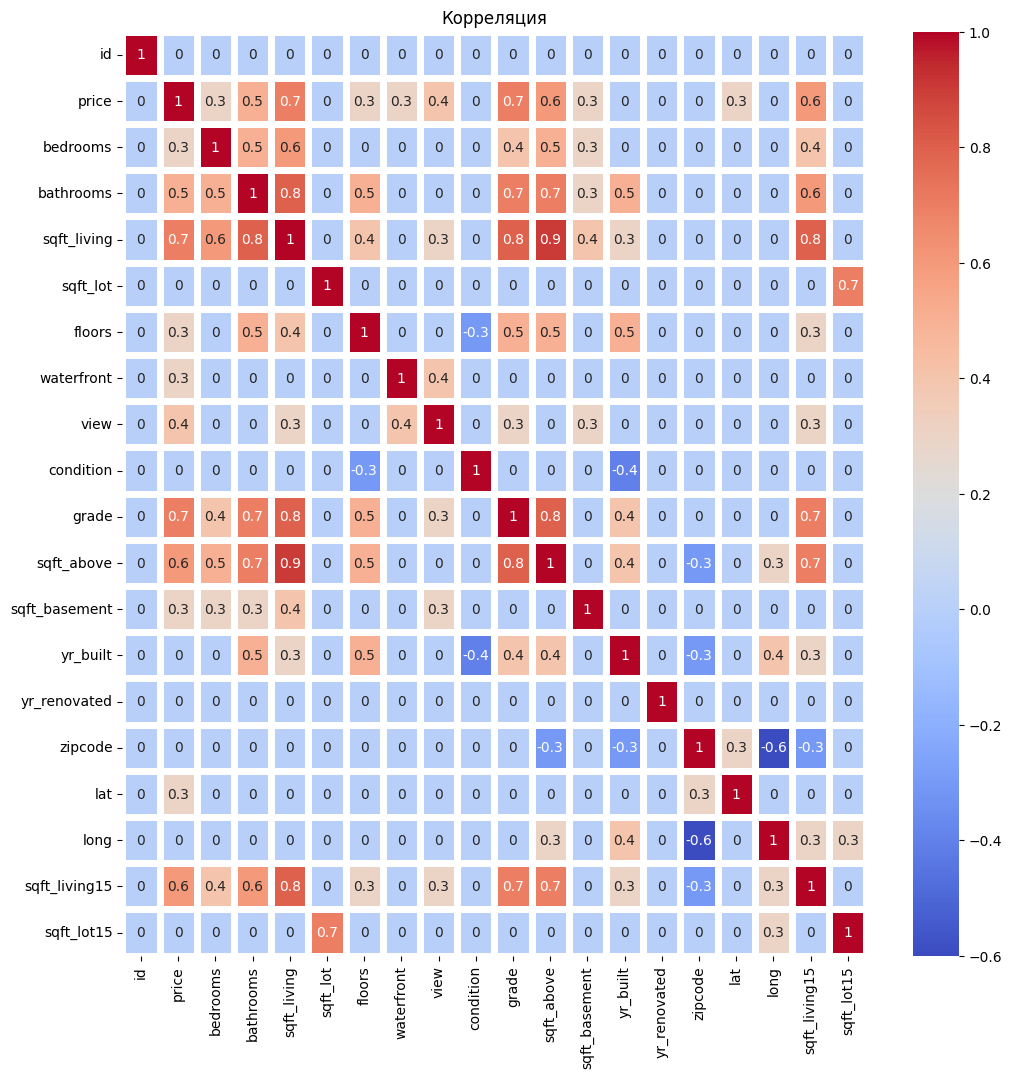

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot = True, linewidths = 5, cmap='coolwarm')
plt.title('Корреляция');

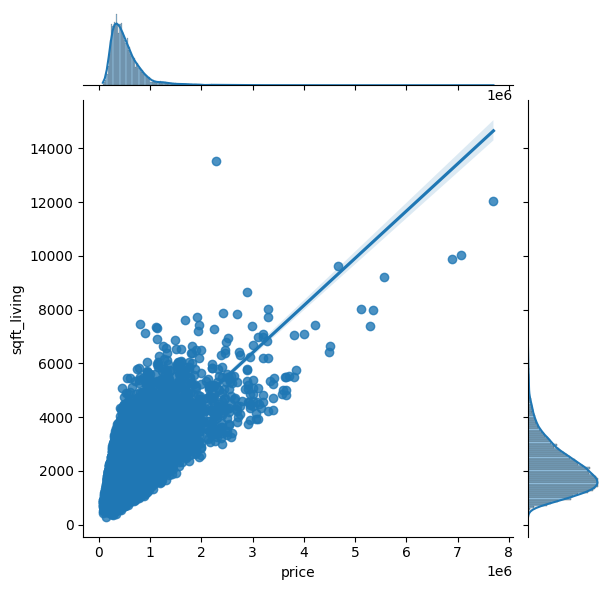

In [ ]:
sns.jointplot(x=hd['price'], y=hd['sqft_living'], kind ='reg');


**Жилая площадь влияет на стоимость недвижимости.В начальных значениях явно выраженна зависимость, а с увелечением цены присутствует разброс цены, указывающий на другие признаки влияния.**

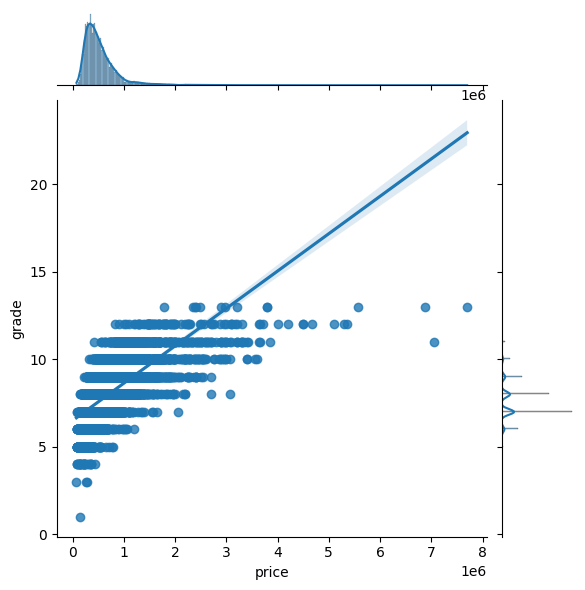

In [ ]:
sns.jointplot(x=hd['price'], y=hd['grade'], kind ='reg');

**Качество конструкции и дизайна  влияет на увелечение стоимости недвижимости**

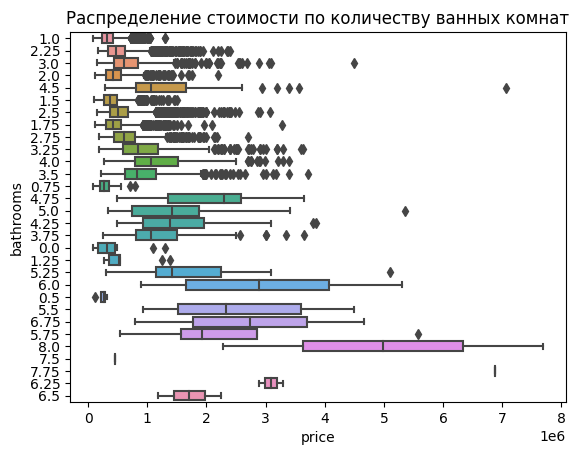

In [ ]:
sns.boxplot(x=hd['price'], y=hd['bathrooms'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('bathrooms')
plt.title('Распределение стоимости по количеству ванных комнат');

**Количество ванных комнат влияет на стоимость недвижимости.Больше комнат , выше цена.**

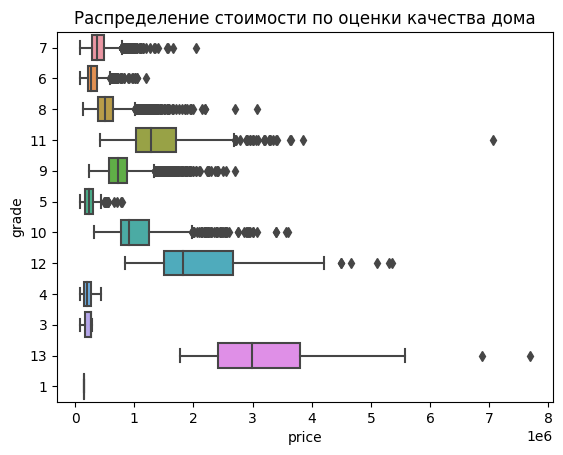

In [ ]:
sns.boxplot(x=hd['price'], y=hd['grade'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('grade')
plt.title('Распределение стоимости по оценки качества дома');


**Высокое качество конструкции и дизайна(на графике 13) влияет на стоимость недвижимости.**

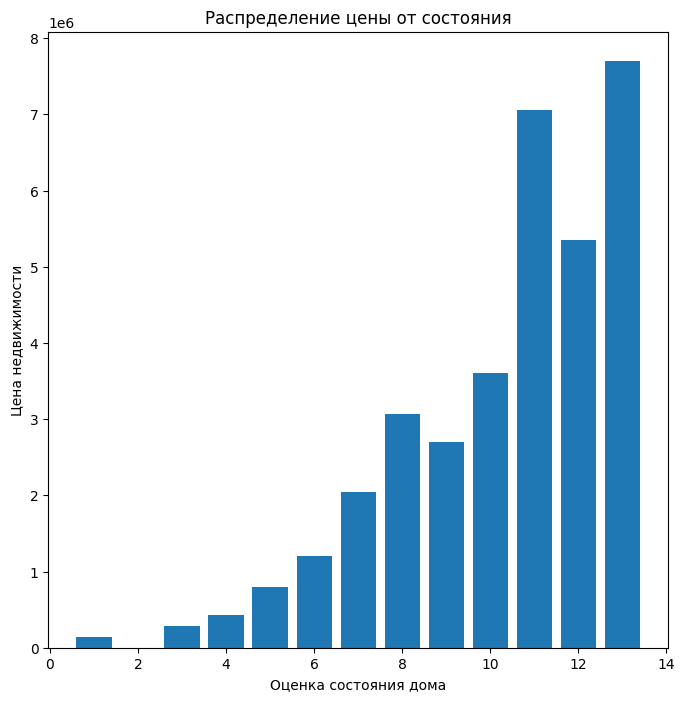

In [ ]:
plt.figure(figsize= (8,8))
plt.bar(hd['grade'],hd['price'])
plt.title("Распределение цены от состояния")
plt.xlabel("Оценка состояния дома")
plt.ylabel("Цена недвижимости");

**Высокое качество конструкции и дизайна влияет на стоимость недвижимости, но есть и исключения , связанные с другими признаками.**